In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
jtplot.style('default', grid=False)

In [3]:
from sabat.sbt_analysis import *
from sabat.sbt_types import *
from sabat.sbt_core import *
from sabat.sbt_espinardo import *

from scripts.galvo_python.gaussian2dFit import *

ModuleNotFoundError: No module named 'scripts'

In [ ]:
from invisible_cities.core.system_of_units import nm
from invisible_cities.core.system_of_units import mW
from invisible_cities.core.system_of_units import milimole, l

In [10]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 14)
plt.rc('ytick', labelsize= 14)
plt.rc('axes', labelsize=14)
plt.rc('axes', titlesize=14)

# Import files

In [12]:
path = '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/*.tif'
files = glob.glob(path)
filesAcn = []
filesFBIBa = []
for f in files:
    if 'FBI_Ba_4ms_ZT405_532pcr_DMLP425x2' in f:
        filesFBIBa.append(f)
    elif 'ACN_350ms_ZT405_532pcr_DMLP425x2' in f:
        filesAcn.append(f)
        
filesFBIBa, filesAcn

(['/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200002.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200016.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200017.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200003.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200015.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200001.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200014.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms_ZT405_532pcr_DMLP425x200010.tif',
  '/Users/pabloherrero/sabat/2pa/berri_setup/UV_led/20201104/20201104_FBI_Ba_4ms

## Combine all images and subtract

Text(0.5, 1.0, 'AcN_350ms_ZT405_532pcr_DMLP425x2 \n(Time scaled)')

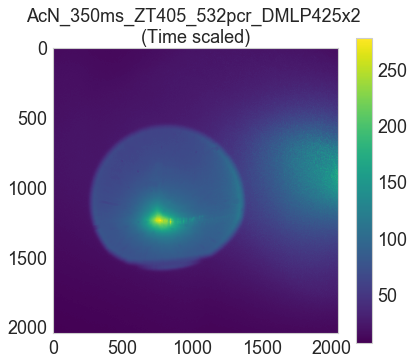

In [9]:
expos_fact = 4/350
imAcn = plt.imread(filesAcn[0]).astype(int)*expos_fact
for f in filesAcn[1:]:
    im = plt.imread(f).astype(int)*expos_fact
    imAcn += im
bar = plt.imshow(imAcn/len(filesAcn))
plt.colorbar(bar)
plt.title('AcN_350ms_ZT405_532pcr_DMLP425x2 \n(Time scaled)')

Text(0.5, 1.0, 'FBI_Ba_0.5mM \n4ms_ZT405_532pcr_DMLP425x2')

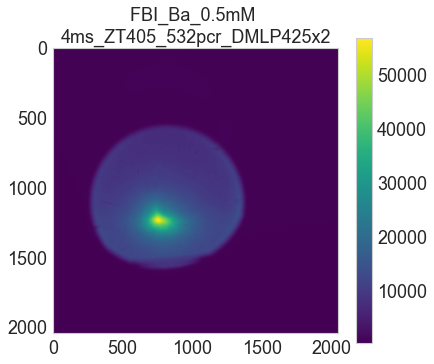

In [10]:
imFBI = plt.imread(filesFBIBa[0]).astype(int)
for f in filesFBIBa[1:]:
    im = plt.imread(f).astype(int)
    imFBI += im
bar = plt.imshow(imFBI/len(filesFBIBa))
plt.colorbar(bar)
plt.title('FBI_Ba_0.5mM \n4ms_ZT405_532pcr_DMLP425x2')

In [156]:
len(filesFBIBa), len(filesAcn)

(20, 21)

Text(0.5, 1.0, 'FBI-Ba 0.5 mM 4ms, AcN bg subtracted')

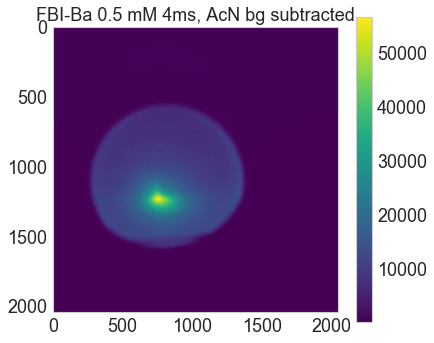

In [11]:
bar = plt.imshow(imFBI/len(filesFBIBa) - imAcn/len(filesAcn))
plt.colorbar(bar)
plt.title('FBI-Ba 0.5 mM 4ms, AcN bg subtracted')

## Subtract only one image

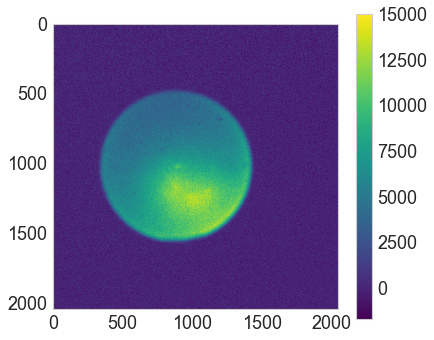

In [27]:
imFBI = plt.imread(filesFBIBa[-1]).astype(int)
imAcn = plt.imread(filesAcn[-1]).astype(int)

bar = plt.imshow(imFBI - imAcn)
plt.colorbar(bar)

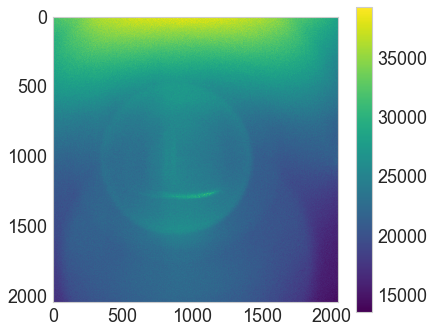

In [9]:
imFBI = plt.imread(filesFBIBa[-1])
imAcn = plt.imread(filesAcn[-1])

bar = plt.imshow(imAcn)
plt.colorbar(bar)

## Integrate ROI

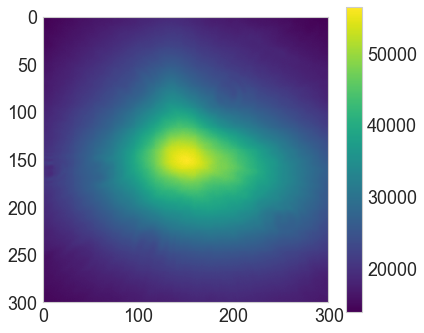

In [12]:
S = imFBI/len(filesFBIBa) - imAcn/len(filesAcn)
mx = guess_centroid(S)
bounds = bound_roi(S, mx, 150)
imroi = select_roi(S, bounds)
bar = plt.imshow(imroi)
plt.colorbar(bar)

In [25]:
S[0,:]

array([509.55380952, 490.23653061, 508.86278912, ..., 512.42183673,
       518.90761905, 506.17564626])

## Bar axis projection

In [ ]:
data = S
y, x = np.mgrid[:len(data[:, 0]), :len(data[0, :])]
# duplicating the grids
xcoord, ycoord = np.array([x] * len(data)), np.array([y] * len(data))
# compute histogram with coordinates as x,y
h, xe, ye = np.histogram2d(
    xcoord.ravel(), ycoord.ravel(),
    bins=[len(data[0, :]), len(data[:, 0])],
    weights=stars.ravel())

In [86]:
type(S)

numpy.ndarray

In [54]:
from scipy.ndimage.interpolation import zoom

In [89]:
def projection_axis_bar(S:np.ndarray, rebin: int = 10):
    """Plot image and bar chart with projection on each axes
    S : image array
    rebin: step in the barcharts"""
    
    grid = plt.GridSpec(4,4, hspace=0.3, wspace=0.3)
    fig = plt.figure(figsize=(10,10))
    main_ax = fig.add_subplot(grid[:-1,1:])
    y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax)
    x_hist = fig.add_subplot(grid[-1,1:], yticklabels=[], sharex=main_ax)

    main_ax.imshow(S)
    # x_hist.hist(S[:,0], 40, histtype='stepfilled', orientation='vertical')
    xbardata = zoom(S.sum(axis=0), 1/rebin)
    x_hist.bar(np.linspace(0, len(S.sum(axis=0)), len(xbardata)), xbardata, width=8*rebin)
    x_hist.invert_yaxis()

    ybardata = zoom(S.sum(axis=1), 1/rebin)
    y_hist.barh(np.linspace(0, len(S.sum(axis=1)), len(ybardata)), ybardata, height=8*rebin)
    y_hist.invert_xaxis()

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


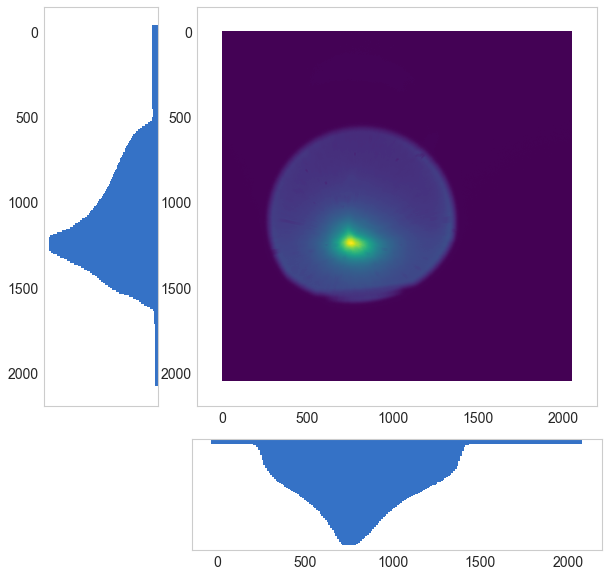

In [92]:
projection_axis_bar(S, rebin=10)

In [44]:
S.sum(axis=1).shape

(2048,)

In [54]:
from scipy.ndimage.interpolation import zoom

In [58]:
zoom(S.sum(axis=1), 0.1).shape

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(205,)

In [48]:
S.sum(axis=1).reshape()

array([1149010.96639456, 1176947.84231293, 1181116.03095238, ...,
        595805.79047619,  593901.14156463,  583917.17537415])

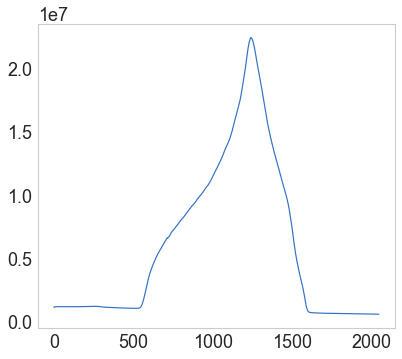

In [26]:
plt.plot(S.sum(axis=1))

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


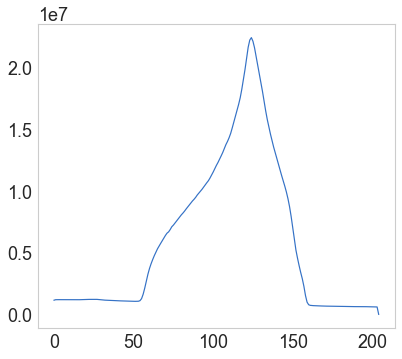

In [59]:
plt.plot()

In [72]:
np.linspace(0,len(S.sum(axis=1)), len(ybardata)).shape

(205,)

In [70]:
ybardata.shape

(205,)

<BarContainer object of 205 artists>

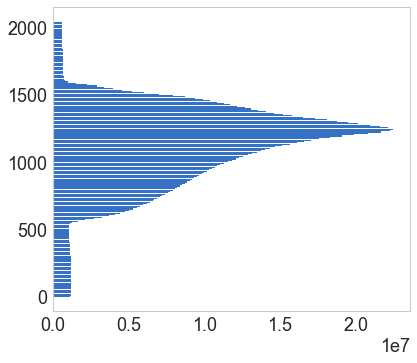

In [32]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
x,y

(array([-0.18686079, -0.88557083,  0.96366233, ...,  0.44815899,
         2.23302014,  0.41901637]),
 array([-1.70611996, -1.54335417,  0.68648796, ..., -0.30659519,
         3.91583942,  0.46255043]))

## Conversion factors

### Obtain from proportionality with ORCA Fusion 

In [57]:
# Conversion gain
K = 0.24 # electrons/count
# Full well capacity
FW = 15000 # electrons
# Read Noise
RN = 1.4 # electrons (rms in fast scan)
# Dynamic range dynr = fwc* RN
dynr = 21400

In [40]:
""" Full well capacity: FW = K * Smax
 Imagine we illuminate both CMOS (Fusion & ORCA) with the same source Smax"""
FWfusion = 15000
FWorca = 30000
Kfusion = 0.24
Korca = Kfusion * FWorca/FWfusion
Korca

0.48

### Convert image to photons

In [16]:
orca = CCD()
imElec = imroi * orca.k

In [17]:
QE = orca.efficiency(lamda = 430 * nm)
print('QE = ', QE)
imPhot = imElec/QE

QE =  0.55


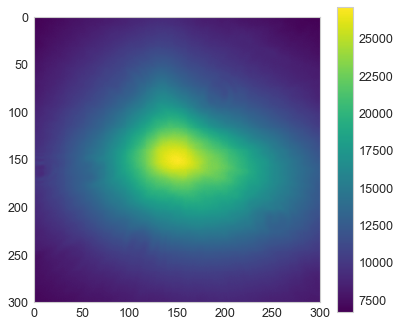

In [146]:
bar = plt.imshow(imElec)
plt.colorbar(bar)

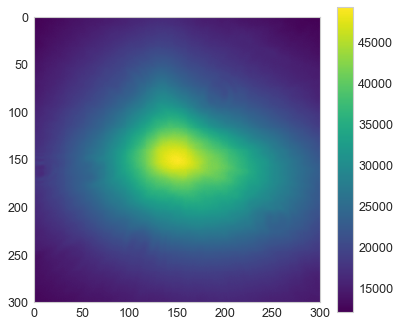

In [147]:
bar = plt.imshow(imPhot)
plt.colorbar(bar)

In [158]:
orca.k/QE

0.8727272727272726

In [10]:
Sphot = S*orca.k / QE
bar = plt.imshow(Sphot)
plt.colorbar(bar)

NameError: name 'S' is not defined

In [149]:
imPhot.max()

49282.15599257884

In [148]:
np.average(imPhot)

22727.039700279198

In [43]:
orca.k / orca.efficiency(lamda = 430 * nm)

0.8727272727272726

##### We have a maximum of 23K photons in the spot

The microscope magnification is 25x, so

A 6.5 µm pixel corresponds to 6.5 µm / 25 = 0.26 µm = 260 nm

# Expected number of photons

In [48]:
SPL = Laser(lamda=405*nm, power=400*mW)
SPL.__repr__()

'\n        Laser:\n        wavelength                =4.0e+02 nm\n        photon energy             =3.1e+00 eV\n        power                     =4.0e+02 mW\n        energy per second         =4.0e+02 mJ\n        photons per second        =8.2e+17 ph/second\n        '

In [50]:
L0 = SPL.n_photons()
L0

815422605.5009941

##### More than enough to saturate the molecules

## Number of emitters and photons

In [75]:
from invisible_cities.core.system_of_units import micron3, mm3, liter, cm3

In [89]:
milimole

0.001

In [160]:
C * micron3

5e-19

In [94]:
Na = 6.022e23
C = 0.5 * milimole/l
n_emit = C * Na
print('Sample contains %.2e emitters/µm3' %(n_emit*micron3))

Sample contains 3.01e+05 emitters/µm3


In [51]:
setup = Microscope(name='topatu', numerical_aperture=0.6, magnification=25, eff_dichroic=0.31, eff_filter=1)


In [164]:
photons_reaching = n_emit * micron3 * setup.optical_transmission() * setup.eff_dichroic
print('The camera should detect %.2e photons/µm3' %photons_reaching)

The camera should detect 2.24e+04 photons/µm3


In [161]:
setup.optical_transmission()

0.08733219254516084

In [98]:
25/6.5

3.8461538461538463

##### The image of 1 µm2 in the object plane is 25^2 µm2 in the image plane (CCD)
Each pixel is 6.5^2 µm2, so 1µm2 in the object plane corresponds to

25µm / 6.5 (px/µm) = 3.84 px ≈ 4 px

A matrix of 4x4 px

In [150]:
mx = guess_centroid(imPhot)
bounds = bound_roi(imPhot, mx, size=2)
imMicron = select_roi(imPhot, bounds)
print('Detected %.2e photons per micron' %imMicron.sum())

Detected 7.84e+05 photons per micron


In [165]:
imMicron.sum()/photons_reaching

35.079040279963564

# Power series

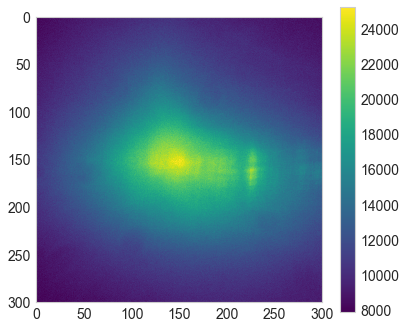

In [15]:
S = plt.imread(filesAcn[0]).astype(int)#*expos_fact

mx = guess_centroid(S)
bounds = bound_roi(S, mx, 150)
imroi = select_roi(S, bounds)
bar = plt.imshow(imroi)
plt.colorbar(bar)

In [20]:
mx
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [26]:
mx

(1239, 765)

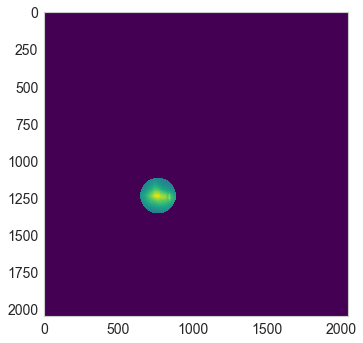

In [34]:
h, w = S.shape[:2]
mask = create_circular_mask(h, w, center=(mx[1], mx[0]), radius=120)
masked_img = S.copy()
masked_img[~mask] = 0
plt.imshow(masked_img)

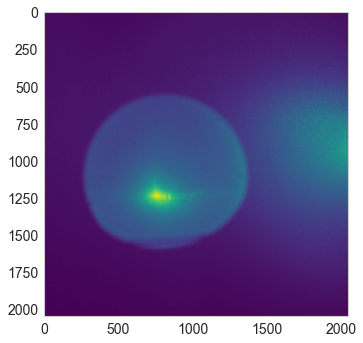

In [22]:
plt.imshow(S)

In [35]:
S.sum(), masked_img.sum()

(16740751950, 690630584)